### Task 2: Quantitative Analysis of Stock Prices
This notebook performs EDA on stock price data, calculates technical indicators using TA-Lib, and prepares data for correlation analysis with news sentiment.


In [2]:
import sys
from pathlib import Path

# Add project root and src/ folder to Python path
project_root = Path("..").resolve()
src_path = project_root / "src"

sys.path.append(str(project_root))
sys.path.append(str(src_path))

In [27]:
import pandas as pd
from pathlib import Path
import pynance as pn 
import matplotlib.pyplot as plt
import talib as ta

# Custom modules
from fns_project.features.indicators import compute_all_indicators
from fns_project.data.loader import load_price_csv
from fns_project.viz.plots import plot_price_with_indicators
from fns_project.config import RAW_DIR, PROCESSED_DIR, DEFAULTS
from fns_project.data.loader import load_price_csv

from fns_project.config import RAW_DIR, PROCESSED_DIR, DEFAULTS
from fns_project.data.loader import load_price_csv



In [18]:
# 2. Load stock price data
TICKER = "NVDA"  # Example ticker symbol
price_file = RAW_DIR / f"price/{TICKER}.csv"  # use RAW_DIR from config
df_price = load_price_csv(price_file, date_col="Date",
                          tz=DEFAULTS["market_tz"])

df_price.head(20)

2025-11-23 22:26:28,788 INFO Loaded prices: 3774 rows from D:\10Acadamy\Week 1\Task\Predicting-Price-Moves-with-News-Sentiment\data\raw\price\NVDA.csv


,date,Close,High,Low,Open,Volume
0,2009-01-01 19:00:00-05:00,0.199652,0.201027,0.184294,0.184982,497124000
1,2009-01-04 19:00:00-05:00,0.203319,0.207904,0.195984,0.197360,705736000
2,2009-01-05 19:00:00-05:00,0.210196,0.216156,0.204695,0.209279,657904000
3,2009-01-06 19:00:00-05:00,0.197589,0.205382,0.190483,0.205382,870096000
4,2009-01-07 19:00:00-05:00,0.192546,0.195067,0.180626,0.195067,1014496000
5,2009-01-08 19:00:00-05:00,0.181773,0.192546,0.181314,0.192546,761352000
6,2009-01-11 19:00:00-05:00,0.174437,0.182689,0.171916,0.181773,645532000
7,2009-01-12 19:00:00-05:00,0.175354,0.182002,0.165269,0.168478,1824424000
8,2009-01-13 19:00:00-05:00,0.167561,0.171228,0.165039,0.169165,974908000
9,2009-01-14 19:00:00-05:00,0.173521,0.176271,0.165039,0.168478,998204000


In [14]:
# Compute SMA20, EMA20, RSI14, MACD
df_ind = compute_all_indicators(df_price)

# Preview last 5 rows to verify
df_ind.tail(5)

,date,Close,High,Low,Open,Volume,daily_return,SMA_20,EMA_20,RSI_14,MACD,MACD_signal,MACD_hist
3769,2023-12-21 19:00:00-05:00,153.419998,154.350006,152.710007,153.770004,29514100,-0.002730,148.578999,148.860492,64.115558,3.135958,2.873052,0.262905
3770,2023-12-25 19:00:00-05:00,153.410004,153.979996,153.029999,153.559998,25067200,-0.000065,148.863000,149.293779,64.085644,3.118650,2.922172,0.196478
3771,2023-12-26 19:00:00-05:00,153.339996,154.779999,153.119995,153.559998,31434700,-0.000456,149.178500,149.679133,63.860893,3.063965,2.950530,0.113434
3772,2023-12-27 19:00:00-05:00,153.380005,154.080002,152.949997,153.720001,27057000,0.000261,149.531499,150.031597,63.938728,2.989395,2.958303,0.031092
3773,2023-12-28 19:00:00-05:00,151.940002,153.889999,151.029999,153.100006,39823200,-0.009388,149.824000,150.213350,59.012257,2.782032,2.923049,-0.141017


               count          mean           std           min           25%  \
Close         3774.0  5.940809e+01  5.491854e+01  2.422000e+00  1.219450e+01   
High          3774.0  6.011639e+01  5.561078e+01  2.505000e+00  1.230025e+01   
Low           3774.0  5.866949e+01  5.423398e+01  2.381500e+00  1.204212e+01   
Open          3774.0  5.942393e+01  5.495377e+01  2.428000e+00  1.214663e+01   
Volume        3774.0  9.185184e+07  6.057553e+07  1.762600e+07  5.586350e+07   
daily_return  3773.0  1.302568e-03  2.182919e-02 -1.404944e-01 -9.258305e-03   
SMA_20        3755.0  5.931843e+01  5.470261e+01  2.615850e+00  1.217850e+01   
EMA_20        3755.0  5.932204e+01  5.467097e+01  2.615850e+00  1.221713e+01   
RSI_14        3760.0  5.456546e+01  1.170149e+01  2.116875e+01  4.582122e+01   
MACD          3741.0  2.694902e-01  1.783870e+00 -1.243150e+01 -1.368561e-01   
MACD_signal   3741.0  2.665258e-01  1.665467e+00 -1.069533e+01 -1.282355e-01   
MACD_hist     3741.0  2.964349e-03  5.66

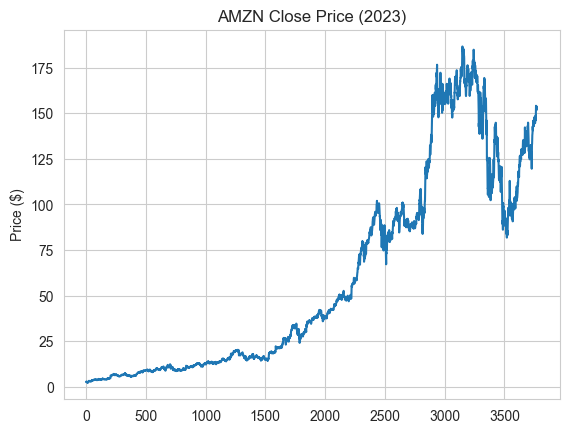

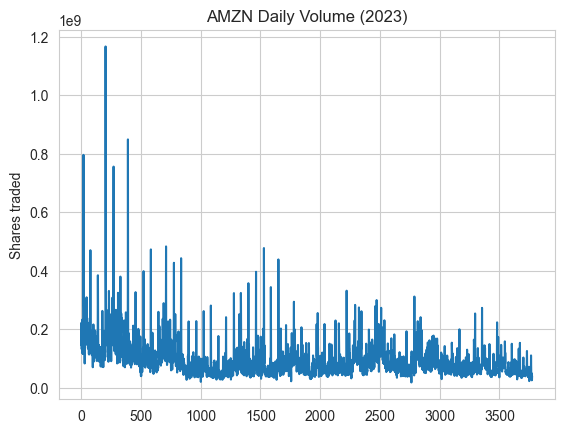

In [15]:
print(df_ind.describe().T)

# Close price chart
df_ind["Close"].plot(title=f"{TICKER} Close Price (2023)")
plt.ylabel("Price ($)")
plt.show()

# Volume chart
df_ind["Volume"].plot(title=f"{TICKER} Daily Volume (2023)")
plt.ylabel("Shares traded")
plt.show()

In [19]:
import numpy as np

# daily returns
df_price["daily_return"] = df_price["Close"].pct_change()

# annualized volatility
vol_annual = df_price["daily_return"].std() * np.sqrt(252)

# annualized Sharpe ratio assuming risk-free = 0
sharpe = (df_price["daily_return"].mean() /
          df_price["daily_return"].std()) * np.sqrt(252)

metrics_df = df_price.copy()
metrics_df["sharpe_ratio"] = sharpe
metrics_df["volatility_annualized"] = vol_annual

metrics_df.tail()

,date,Close,High,Low,Open,Volume,daily_return,sharpe_ratio,volatility_annualized
3769,2023-12-21 19:00:00-05:00,48.805527,49.358247,48.442706,49.170342,252507000,-0.003266,1.030366,0.459048
3770,2023-12-25 19:00:00-05:00,49.254299,49.575137,48.935459,48.943454,244200000,0.009195,1.030366,0.459048
3771,2023-12-26 19:00:00-05:00,49.392231,49.655100,49.060397,49.486186,233648000,0.002800,1.030366,0.459048
3772,2023-12-27 19:00:00-05:00,49.497185,49.859003,49.387239,49.618126,246587000,0.002125,1.030366,0.459048
3773,2023-12-28 19:00:00-05:00,49.497185,49.971949,48.726571,49.788039,389293000,0.000000,1.030366,0.459048


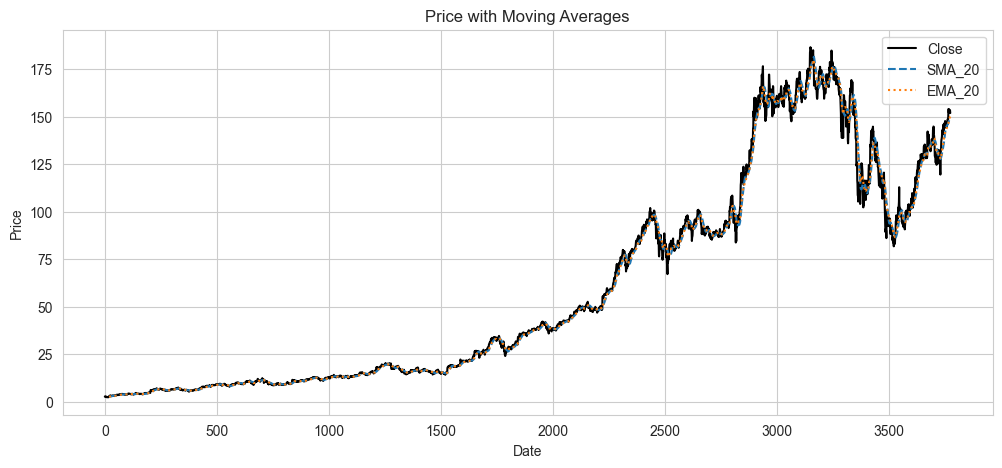

In [23]:
plot_price_with_indicators(
    df_ind,
    close_col="Close",
    sma_col="SMA_20",
    ema_col="EMA_20",
)

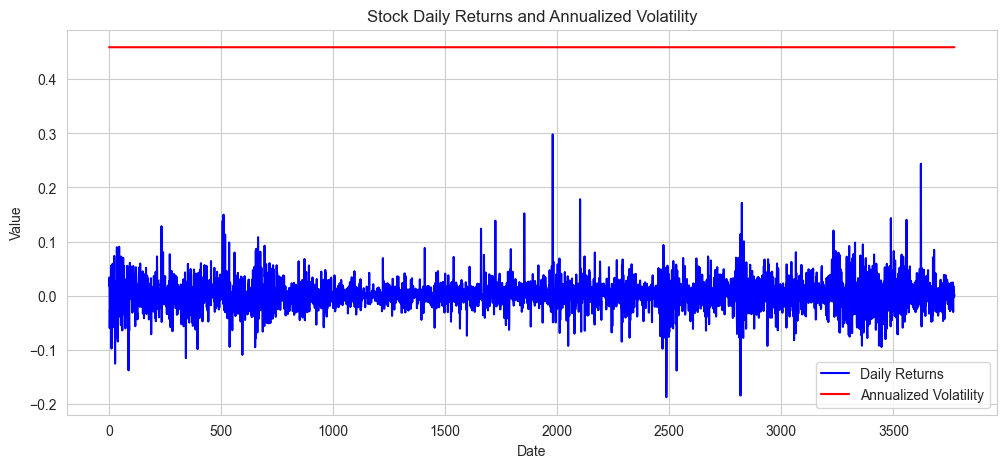

In [24]:
plt.figure(figsize=(12, 5))
plt.plot(metrics_df.index,
         metrics_df["daily_return"], label="Daily Returns", color="blue")
plt.plot(metrics_df.index, metrics_df["volatility_annualized"],
         label="Annualized Volatility", color="red")
plt.title("Stock Daily Returns and Annualized Volatility")
plt.xlabel("Date")
plt.ylabel("Value")
plt.legend()
plt.grid(True)
plt.show()

d:\10Acadamy\Week 1\Task\Predicting-Price-Moves-with-News-Sentiment\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


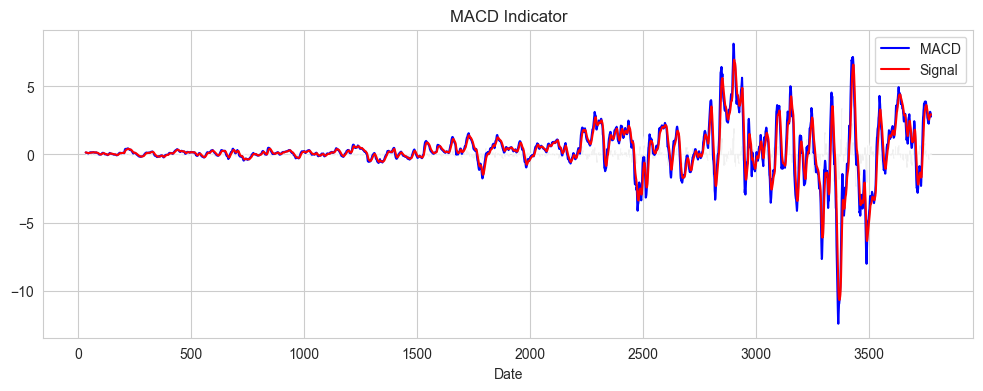

In [28]:
# 7. MACD
macd, macdsignal, macdhist = ta.MACD(
df_ind['Close'], fastperiod=12, slowperiod=26, signalperiod=9)
df_ind['MACD'] = macd
df_ind['MACD_signal'] = macdsignal
df_ind['MACD_hist'] = macdhist

plt.figure(figsize=(12, 4))
plt.plot(df_ind.index, df_ind['MACD'], label='MACD', color='blue')
plt.plot(df_ind.index, df_ind['MACD_signal'],
         label='Signal', color='red')
plt.bar(df_ind.index, df_ind['MACD_hist'], color='gray', alpha=0.5)
plt.title('MACD Indicator')
plt.xlabel('Date')
plt.legend()
plt.show()

In [32]:
# 9. Save processed features
processed_file = PROCESSED_DIR / f"price/{TICKER}_features.csv"
df_ind.to_csv(processed_file, index=False)
print(f"Saved processed price features to: {processed_file}")

Saved processed price features to: D:\10Acadamy\Week 1\Task\Predicting-Price-Moves-with-News-Sentiment\data\processed\price\NVDA_features.csv
